# Titanic Dataset

Predicting wheather a Passenger would survive or not

Attribute Information:
    
* Survived : Survival(0 = No, 1 = Yes)
* Pclass : Ticket class( 1 = 1st, 2 = 2nd, 3 = 3rd)
* sex : Sex 
* Age : Age in years
* SibSp : Number of siblings / spouses aboard the Titanic
* Parch : Number of parents / children aboard the Titanic
* Ticket : Ticket number
* Fare : Passenger fare
* Cabin : Cabin number
* Embarked : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [70]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [71]:
df_titanic=pd.read_csv('titanic_train.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
#dropping Name nad PassengerId columns as it is of no use in the dataset
df_titanic.drop(['Name','PassengerId'],axis=1,inplace=True)

In [73]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
df_titanic.shape

(891, 10)

In [75]:
df_titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [76]:
df_titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [77]:
df_titanic.Pclass.unique()

array([3, 1, 2])

In [78]:
df_titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [79]:
#checking the null values
df_titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

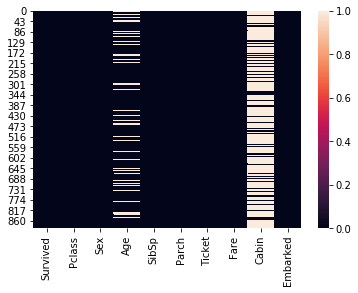

In [80]:
sns.heatmap(df_titanic.isnull())

Dataset has missing values in "Age", "Cabin" and "Embarked" columns

# Filling missing data

In [81]:
#filling null values of numerical data
df_titanic['Age']=df_titanic['Age'].replace(np.NaN,df_titanic['Age'].mean())

In [82]:
#filling null values of categorical data
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode().values[0],inplace=True)
df_titanic['Cabin'].fillna(df_titanic['Cabin'].mode().values[0],inplace=True)

In [83]:
df_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [84]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    object 
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [85]:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
df_titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


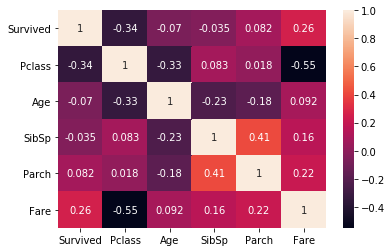

In [87]:
sns.heatmap(df_titanic.corr(), annot=True)

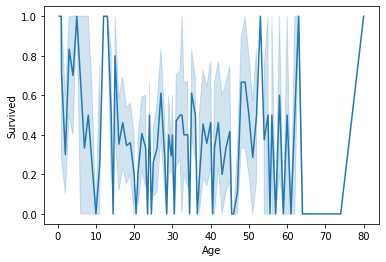

In [88]:
sns.lineplot(x='Age',y='Survived',data=df_titanic)

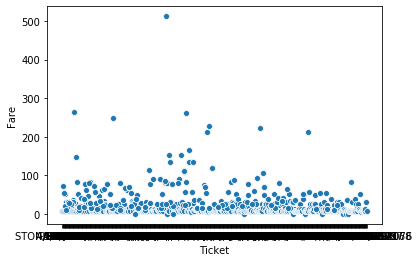

In [89]:
sns.scatterplot(x='Ticket',y='Fare',data=df_titanic)

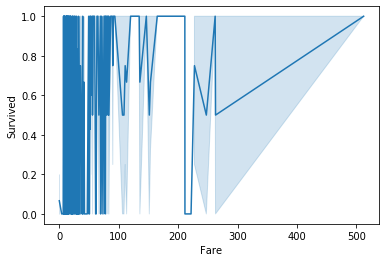

In [90]:
sns.lineplot(x='Fare',y='Survived',data=df_titanic)
plt.show()

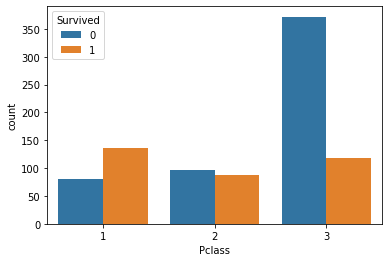

In [91]:
sns.countplot(x='Pclass',hue='Survived',data=df_titanic)
plt.show()

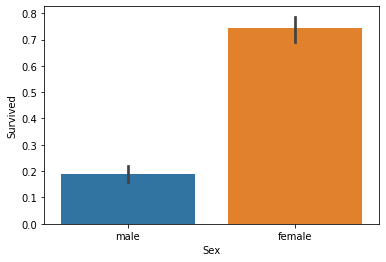

In [92]:
sns.barplot(x='Sex',y='Survived',data=df_titanic)
#Female passenger have more survival 

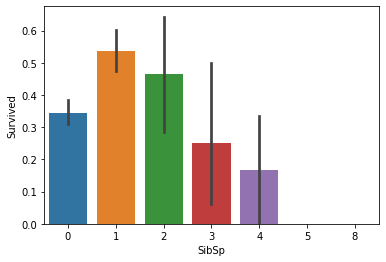

In [93]:
sns.barplot(x='SibSp',y='Survived',data=df_titanic)
#passengers with one or two sibblings or spouse have survived more.

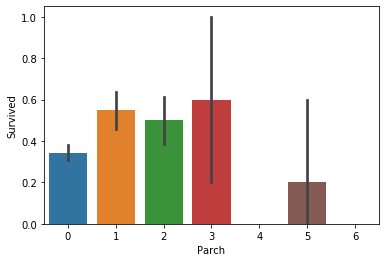

In [94]:
sns.barplot(x='Parch',y='Survived',data=df_titanic)

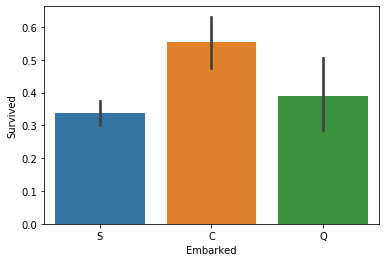

In [95]:
sns.barplot(x='Embarked',y='Survived',data=df_titanic)
plt.show()

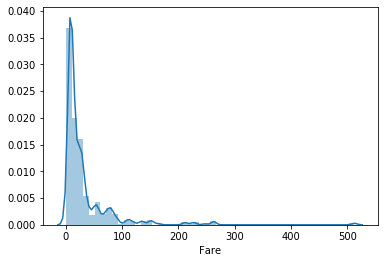

In [96]:
sns.distplot(df_titanic['Fare'])
#The data is skewed

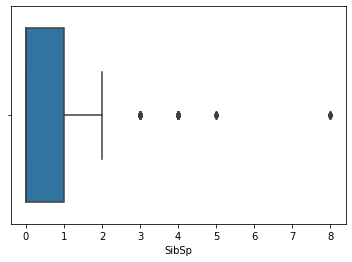

In [97]:
sns.boxplot(df_titanic['SibSp'])
#There are few extreme outliers

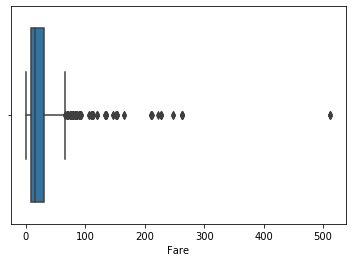

In [98]:
sns.boxplot(df_titanic['Fare'])
#There are many outliers

In [99]:
#Removing outliers
print('The shape before removing outliers',df_titanic.shape)
from scipy.stats import zscore
z=np.abs(zscore(df_titanic))
df_titanic=df_titanic[(z<3).all(axis=1)]
print('The shape after removing outliers',df_titanic.shape)

The shape before removing outliers (891, 10)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
df_titanic.skew()

In [ ]:
#Reducing skewness using sqrt function
for col in df_titanic.columns:
    if df_titanic.skew().loc[col]>0.55:
        df_titanic[col]=np.sqrt(df_titanic[col])    

In [ ]:
df_titanic.skew()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_titanic['Sex']=le.fit_transform(df_titanic['Sex'])
df_titanic['Cabin']=le.fit_transform(df_titanic['Cabin'])
df_titanic['Ticket']=le.fit_transform(df_titanic['Ticket'])
df_titanic['Embarked']=le.fit_transform(df_titanic['Embarked'])

In [ ]:
#Further Analysis
df_titanic.groupby(['Age']).mean()

In [ ]:
df_titanic['Age_group']=df_titanic['Age'].astype(int)
df_titanic['Age_group'].replace(range(0,6),('Infant'),inplace=True)
df_titanic['Age_group'].replace(range(6,19),('Child'),inplace=True)
df_titanic['Age_group'].replace(range(19,60),('Adult'),inplace=True)
df_titanic['Age_group'].replace(range(60,100),('Elderly'),inplace=True)

In [ ]:
df_titanic[('Age_group')].value_counts()

In [ ]:
df_titanic.groupby(['Age_group']).mean()
#The survival rate in infants is high.
#Fare for elderly seems to be higher than other age group

In [ ]:
df_titanic.groupby(['Sex']).mean()
#The survival rate of female is higher than men
#Fare is higher for women which may indicate that women travelled in higher class

In [ ]:
#dropping the Age_group column as we created it for our data analysis purpose
df_titanic.drop(['Age_group'],axis=1,inplace=True)

In [ ]:
df_titanic.plot(kind='kde',subplots=True,layout=(4,3),sharex=False)
plt.show()

In [ ]:
sns.pairplot(df_titanic)
plt.show()

In [ ]:
#Splitting the data into target and input 
x=df_titanic.drop('Survived',axis=1)
y=pd.DataFrame(df_titanic['Survived'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(x)

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc

In [ ]:
#Finding out the best random state
max_accuracy_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    pred = lg.predict(x_test)
    acc_scr=accuracy_score(y_test,pred)
    print("accuracy_score corresponding to random state:",r_state, " is: ",acc_scr)
    if acc_scr>max_accuracy_score:
        max_accuracy_score=acc_scr
        final_r_state=r_state
        
print("max accuracy score corresponding to",final_r_state," is ",max_accuracy_score)     

In [ ]:
#Finalizing the tain_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=86,test_size=0.20)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), x,y,cv=5,scoring="accuracy").mean()

# Using GridSearchCV to select the best parameter

In [ ]:
#best parameters for SVC

from sklearn.model_selection import GridSearchCV
svc = SVC()
grid_param ={'kernel': ('linear','poly','rbf'), 'C':[1,10]}
gd=GridSearchCV(svc,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

In [ ]:
#best parameters for KNeighbors

knn=KNeighborsClassifier()
grid_param ={'n_neighbors':range(1,10)}
gd=GridSearchCV(knn,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

In [ ]:
#best parameters for DecisionTree

dtc=DecisionTreeClassifier()
grid_param ={'criterion': ['gini', 'entropy']}
gd=GridSearchCV(dtc,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

In [ ]:
#best parameters for RandomForest

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
grid_param={"n_estimators":[10,100,500,1000]}
gd=GridSearchCV(rfc,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

In [ ]:
#Testing the models with the best parameters calculated

model=[]
score=[]
cvs=[]
rocscore=[]

for i in [LogisticRegression(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(criterion='gini'),SVC(kernel='rbf',C=10),RandomForestClassifier(n_estimators=1000),GaussianNB()]:
    model.append(i)
    print('\n')
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    pred=i.predict(x_test)
    print(pred)
    ac=accuracy_score(y_test,pred)
    print('Accuracy score of',i,'is:',ac)
    score.append(ac)
    print('\n')
    cv_score=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    print('The CV Score is', cv_score)
    cvs.append(cv_score)
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()

In [ ]:
result=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','SVC','RandomForestClassifier','GaussianNB'],'Accuracy_Score':score,'Cross_val_score':cvs})
result

Since LogisticRegression is giving better results,we finalize the same

In [ ]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(lg,'titanic_lg.pkl')